In [ ]:
%IPSC_Estim_FlowIn_Analysis
%This script prompts the user to select a folder from which it loads all
%the acqusitions in the '0' channel
%It then asks you to specify the flow-in epochs (not including baseline)
%Then it will plot the raw and baselined data. Using this, specify the
%range to calculate the peaks
%It will now plot Rs, Rm, PPR, C, Peaks, Leak Current, with each epoch in a
%different color. A legen with what flow ins correspond to what drug will
%appear on the Peaks figure.
%This is when I usually put all the figures into the "Show Plot Tools", so
%I can modify the axes, change marker size if I want etc...
%Once you are happy with the figures, type in 'Y' into the command window
%where you are asked if you'd like to save the figures (as TIFFS) and 
%dataStructure into the current directory. The dataStructure is a structure
%that contains fields for all the parameters (Rm, Rs, Peak1, Peak2 etc...)
%so you can easily reload a cell in the future to do future analysis
%without having to rerun this script.
%Finally, it will ask if you'd like to plot an Acq to obtain a VCRC for
%purposes of our cell summary graphs.

In [1]:
addpath(genpath(cd)) %add current directory and subfolders to matlab path so it can access all neccesary functions

In [2]:
%Load acquistion and initalize figure
currFig = 1;

%% Load Acquisitions
warning('off')
LoadAcqs;
warning('on')


In [3]:
%% Define Flow-in Epochs and Flow-in Conditions

%Flow-in Epochswhic
FlowInEpochs = 3;

%Flow in conditions
%Input first as a string
FlowInCondsStr = 'ENK';

%Split string into cell array based on comma delimiter
    %Refer to note on splitstring above
FlowInConds = strsplit(FlowInCondsStr,',');

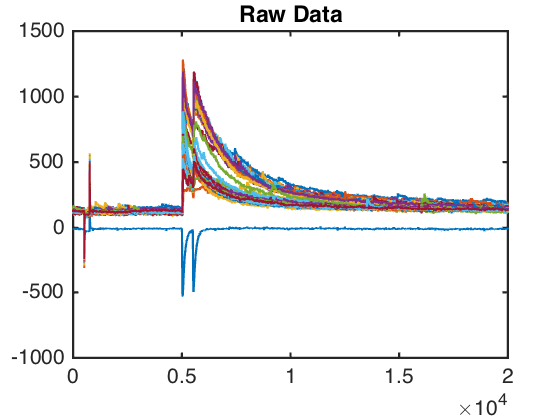

In [4]:
%% Plot Raw Acquisitions, Baseline them, and plot the baselined acqs
plotAcqs;


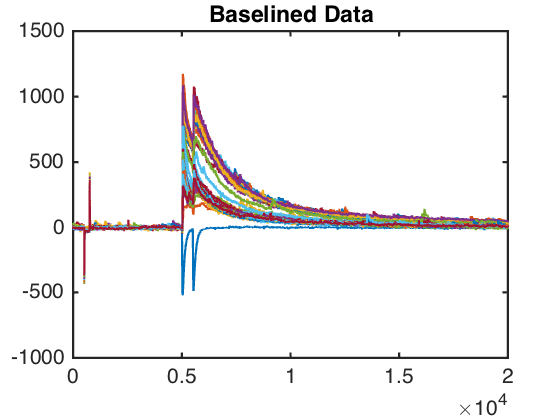

In [5]:
% Baseline Acqs
baselineAcqs;
plotAcqsBl;

In [6]:
%% Extracting Rs, Rm, Cm, leak Current and Peak
blAcqs = who('*_bl'); %this is a cell with the names of all the baselined acqs

%Initialize matrices for all the parameters
Rs = zeros(1,length(blAcqs));
Rm = zeros(1,length(blAcqs));
Cm = zeros(1,length(blAcqs));
Ihold = zeros(1,length(blAcqs));
peak1 = zeros(1,length(blAcqs));
peak2_raw = zeros(1,length(blAcqs));
peak2_bl = zeros(1,length(blAcqs));
baseline2 = zeros(1,length(blAcqs));
%Prompt user to enter an array for each peak (to be averaged)
peakRegion1 = 5050:5060;
peakRegion2 = 5550:5560;

%Cycle through each baselined acq, extract each paramater
for iAcq = 1:length(blAcqs)
    if exist(strcat('AD0_',num2str(iAcq)))
        Rs(iAcq) = eval(strcat('getRs(AD0_',num2str(iAcq),')'));
        Rm(iAcq) = eval(strcat('getRm(AD0_',num2str(iAcq),')'));
        Cm(iAcq) = eval(strcat('getCm(AD0_',num2str(iAcq),')'));
        Ihold(iAcq)= eval(strcat('getIhold(AD0_',num2str(iAcq),')'));
        peak1(iAcq) = eval(strcat('mean(AD0_',num2str(iAcq), ...
            '_bl(peakRegion1))'));
        peak2_raw(iAcq) = eval(strcat('mean(AD0_',num2str(iAcq), ...
            '_bl(peakRegion2))')); %raw meaning not baseline subtracted from
        %decaying IPSC from first stimulus.
        baseline2(iAcq) = eval(strcat('mean(AD0_',num2str(iAcq), ...
            '_bl(5485:5495))')); %10ms baseline average of decaying IPSC 
        %before the second stimulus for calculating peak2_bl
        peak2_bl(iAcq) = peak2_raw(iAcq) - baseline2(iAcq);
    end
end

%% Extracting the Acq nums for each Epoch
getEpochAcqNames;
getEpochAcqNums;


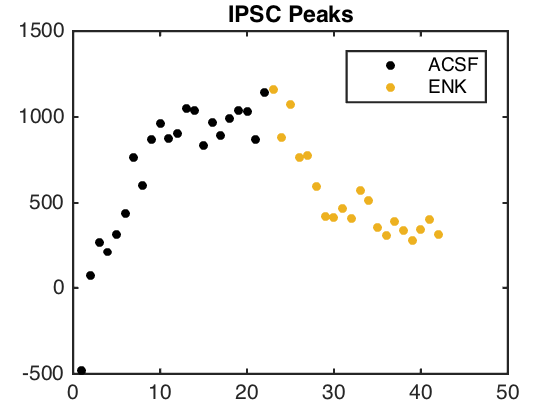

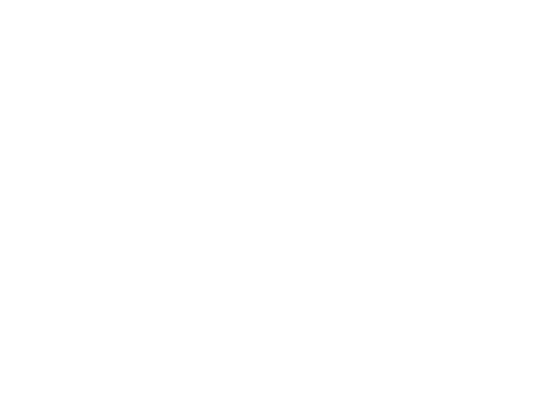

In [7]:
%Set plotting colors
% Plotting everything 

%plot the flow in epochs different colors
colors = colormap('Lines');

% Plot Peak IPSCs
%Peak 1
figure(currFig)
plot(peak1,'.','Color','k','MarkerSize',15);
hTitle(currFig) = title('IPSC Peaks');
hold on
for iE = FlowInEpochs
    %get first Acq num of the first relevant epoch
    beginAcq = epochAcqNums(iE);
    
    %plot to the end if its the last epoch
    if iE == FlowInEpochs(end)
        plot(beginAcq:length(peak1),peak1(beginAcq:end),'.','Color',colors(iE,:), ...
            'MarkerSize',15);
        hold on
    else %or else just to the next epoch
        endAcq = epochAcqNums(iE+1)-1;
        plot(beginAcq:endAcq,peak1(beginAcq:endAcq),'.','Color',colors(iE,:), ...
            'MarkerSize',15);
        hold on
    end
end
currFig = currFig + 1;
%On the peaks figure, add a legend with the conditions. Here I manually add
%ACSF as the first condition, and then it uses the user inputed conditions
%(stored in FlowInConds) to add the rest
legend({'ACSF',FlowInConds{:}});

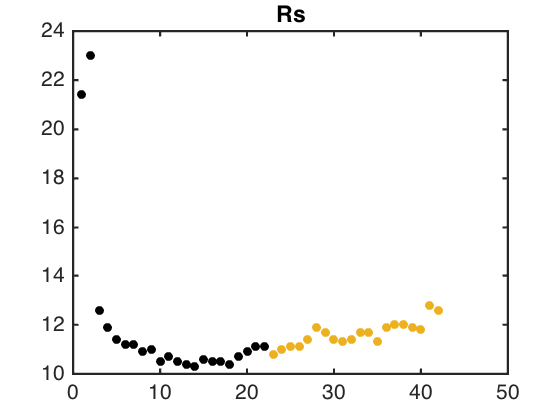

In [8]:
%Plot Rs

%Rs
figure(currFig)
plot(Rs,'.','Color','k','MarkerSize',15);
hTitle(currFig) = title('Rs');
hold on
for iE = FlowInEpochs
    %get first Acq num of the first relevant epoch
    beginAcq = epochAcqNums(iE);
    
    %plot to the end if its the last epoch
    if iE == FlowInEpochs(end)
        plot(beginAcq:length(Rs),Rs(beginAcq:end),'.','Color',colors(iE,:), ...
            'MarkerSize',15);
        hold on
    else %or else just to the next epoch
        endAcq = epochAcqNums(iE+1)-1;
        plot(beginAcq:endAcq,Rs(beginAcq:endAcq),'.','Color',colors(iE,:), ...
            'MarkerSize',15);
        hold on
    end
end
currFig = currFig + 1;

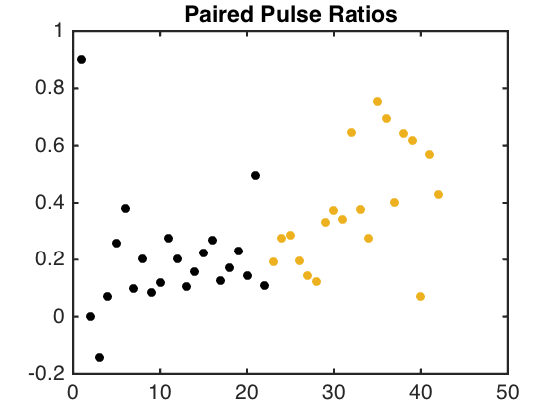

In [9]:


%Paired Pulse Ratios
PPRs = peak2_bl./peak1;
figure(currFig)
plot(PPRs,'.k','MarkerSize',15);
hTitle(currFig) = title('Paired Pulse Ratios');
hold on
for iE = FlowInEpochs
    %get first Acq num of the first relevant epoch
    beginAcq = epochAcqNums(iE);
    
    %plot to the end if its the last epoch
    if iE == FlowInEpochs(end)
        plot(beginAcq:length(PPRs),PPRs(beginAcq:end),'.','Color',colors(iE,:), ...
            'MarkerSize',15);
        hold on
    else %or else just to the next epoch
        endAcq = epochAcqNums(iE+1)-1;
        plot(beginAcq:endAcq,PPRs(beginAcq:endAcq),'.','Color',colors(iE,:), ...
            'MarkerSize',15);
        hold on
    end
end
currFig = currFig + 1;

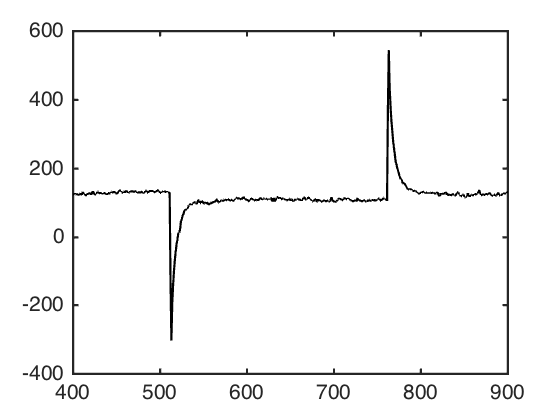

In [10]:
%% plot VCRC
figure(currFig)
VCRC = 15;
plot(AD0_15.data,'k')
xlim([400,900])
currFig = currFig + 1;

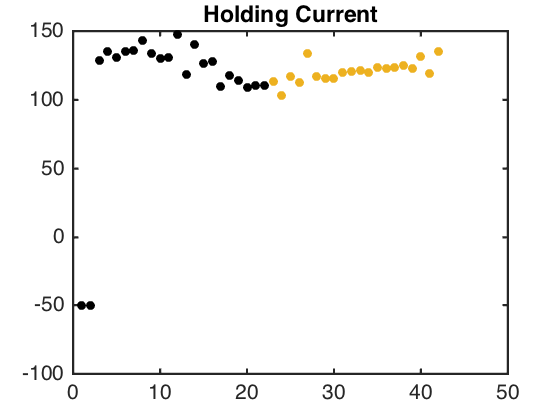

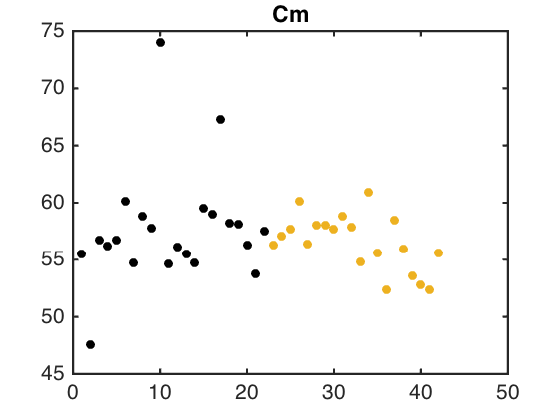

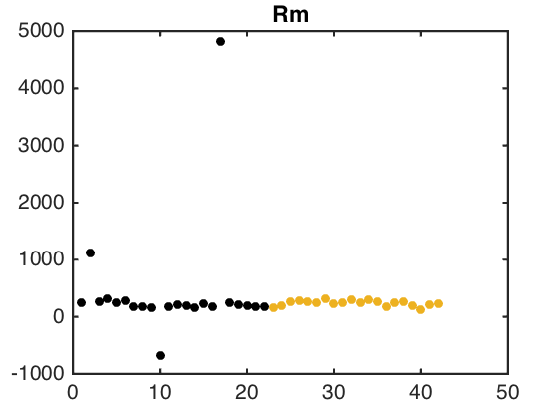

In [11]:
%Plot Rm, Cm, Leak current

%Rm
figure(currFig)
plot(Rm,'.k','MarkerSize',15);
hTitle(currFig) = title('Rm');
hold on
for iE = FlowInEpochs
    %get first Acq num of the first relevant epoch
    beginAcq = epochAcqNums(iE);
    
    %plot to the end if its the last epoch
    if iE == FlowInEpochs(end)
        plot(beginAcq:length(Rm),Rm(beginAcq:end),'.','Color',colors(iE,:), ...
            'MarkerSize',15);
        hold on
    else %or else just to the next epoch
        endAcq = epochAcqNums(iE+1)-1;
        plot(beginAcq:endAcq,Rm(beginAcq:endAcq),'.','Color',colors(iE,:), ...
            'MarkerSize',15);
        hold on
    end
end
currFig = currFig + 1;

%Cm
figure(currFig)
plot(Cm,'.k','MarkerSize',15);
hTitle(currFig) = title('Cm');
hold on
for iE = FlowInEpochs
    %get first Acq num of the first relevant epoch
    beginAcq = epochAcqNums(iE);
    
    %plot to the end if its the last epoch
    if iE == FlowInEpochs(end)
        plot(beginAcq:length(Cm),Cm(beginAcq:end),'.','Color',colors(iE,:), ...
            'MarkerSize',15);
        hold on
    else %or else just to the next epoch
        endAcq = epochAcqNums(iE+1)-1;
        plot(beginAcq:endAcq,Cm(beginAcq:endAcq),'.','Color',colors(iE,:), ...
            'MarkerSize',15);
        hold on
    end
end
currFig = currFig + 1;

%Leak Current
figure(currFig)
plot(Ihold,'.k','MarkerSize',15);
hTitle(currFig) = title('Holding Current');
hold on
for iE = FlowInEpochs
    %get first Acq num of the first relevant epoch
    beginAcq = epochAcqNums(iE);
    
    %plot to the end if its the last epoch
    if iE == FlowInEpochs(end)
        plot(beginAcq:length(Ihold),Ihold(beginAcq:end),'.','Color',colors(iE,:), ...
            'MarkerSize',15);
        hold on
    else %or else just to the next epoch
        endAcq = epochAcqNums(iE+1)-1;
        plot(beginAcq:endAcq,Ihold(beginAcq:endAcq),'.','Color',colors(iE,:), ...
            'MarkerSize',15);
        hold on
    end
end
currFig = currFig + 1;